In [1]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from pandas import DataFrame
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
%matplotlib inline

In [2]:
#Read dataset
df=pd.read_csv("./car_ad.csv", encoding='latin-1')

In [3]:
df = df.drop(df[df.price <= 0 ].index)

In [4]:
df.price[df.price == 0].count()

0

In [5]:
df.head(3)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear


In [6]:
df.shape

(9309, 10)

In [7]:
df = df.dropna()
df.shape

(8495, 10)

In [8]:
ordered_columns = ['car', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive', 'price']
df = df[ordered_columns]
df

,car,body,mileage,engV,engType,registration,year,model,drive,price
0,Ford,crossover,68,2.5,Gas,yes,2010,Kuga,full,15500.0
1,Mercedes-Benz,sedan,173,1.8,Gas,yes,2011,E-Class,rear,20500.0
2,Mercedes-Benz,other,135,5.5,Petrol,yes,2008,CL 550,rear,35000.0
3,Mercedes-Benz,van,162,1.8,Diesel,yes,2012,B 180,front,17800.0
5,Nissan,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,16600.0
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,crossover,140,2.0,Gas,yes,2011,Tucson,front,14500.0
9572,Volkswagen,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,2200.0
9573,Mercedes-Benz,crossover,180,3.5,Petrol,yes,2008,ML 350,full,18500.0
9574,Lexus,sedan,150,3.5,Gas,yes,2008,ES 350,front,16999.0


### categorical variables

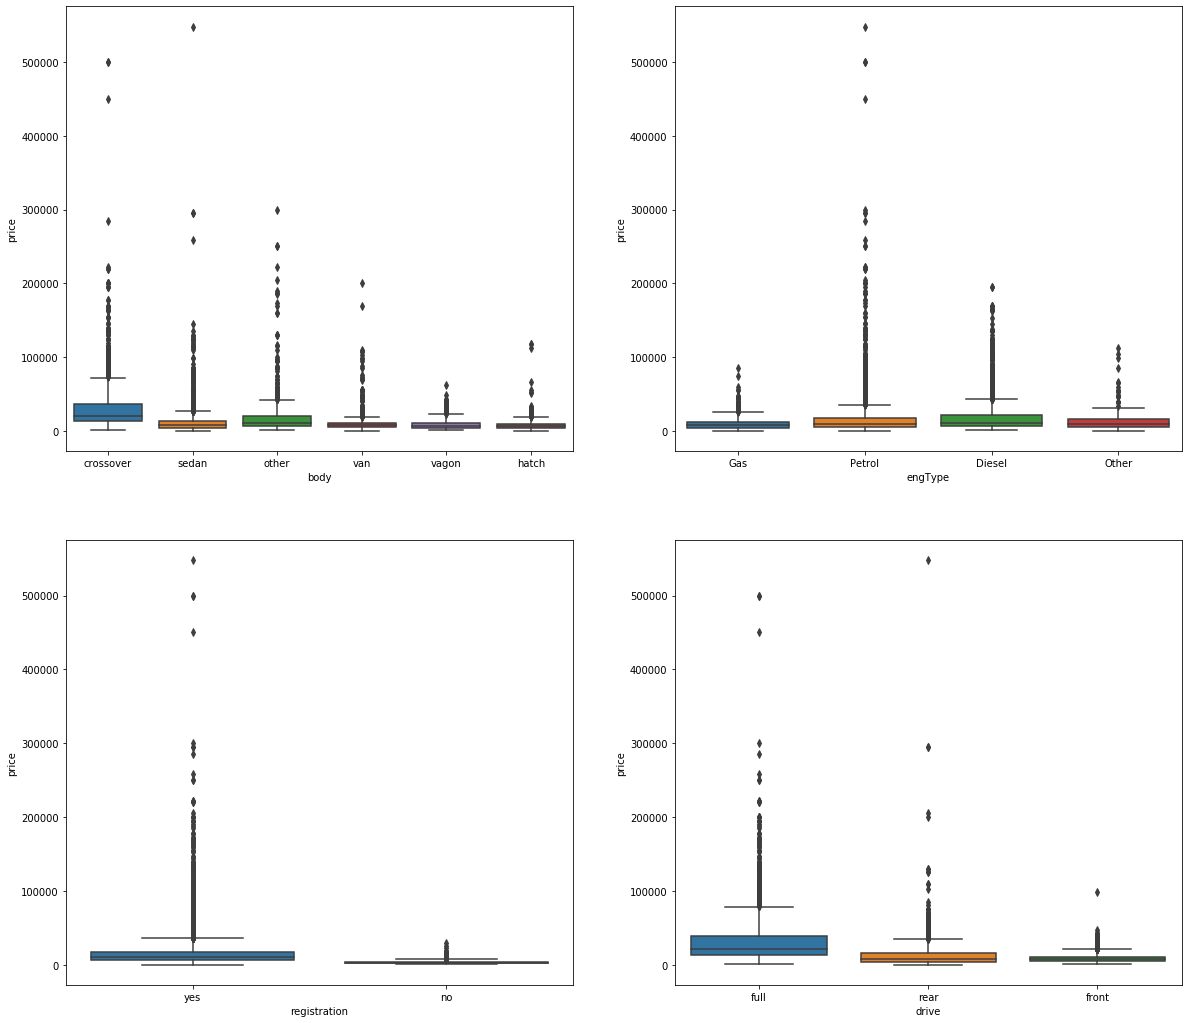

In [9]:
plt.figure(figsize=(20,18))
variables = ['body', 'engType', 'registration', 'drive']
for i, each in enumerate(variables):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=each, y='price', data=df)

### numerical variables

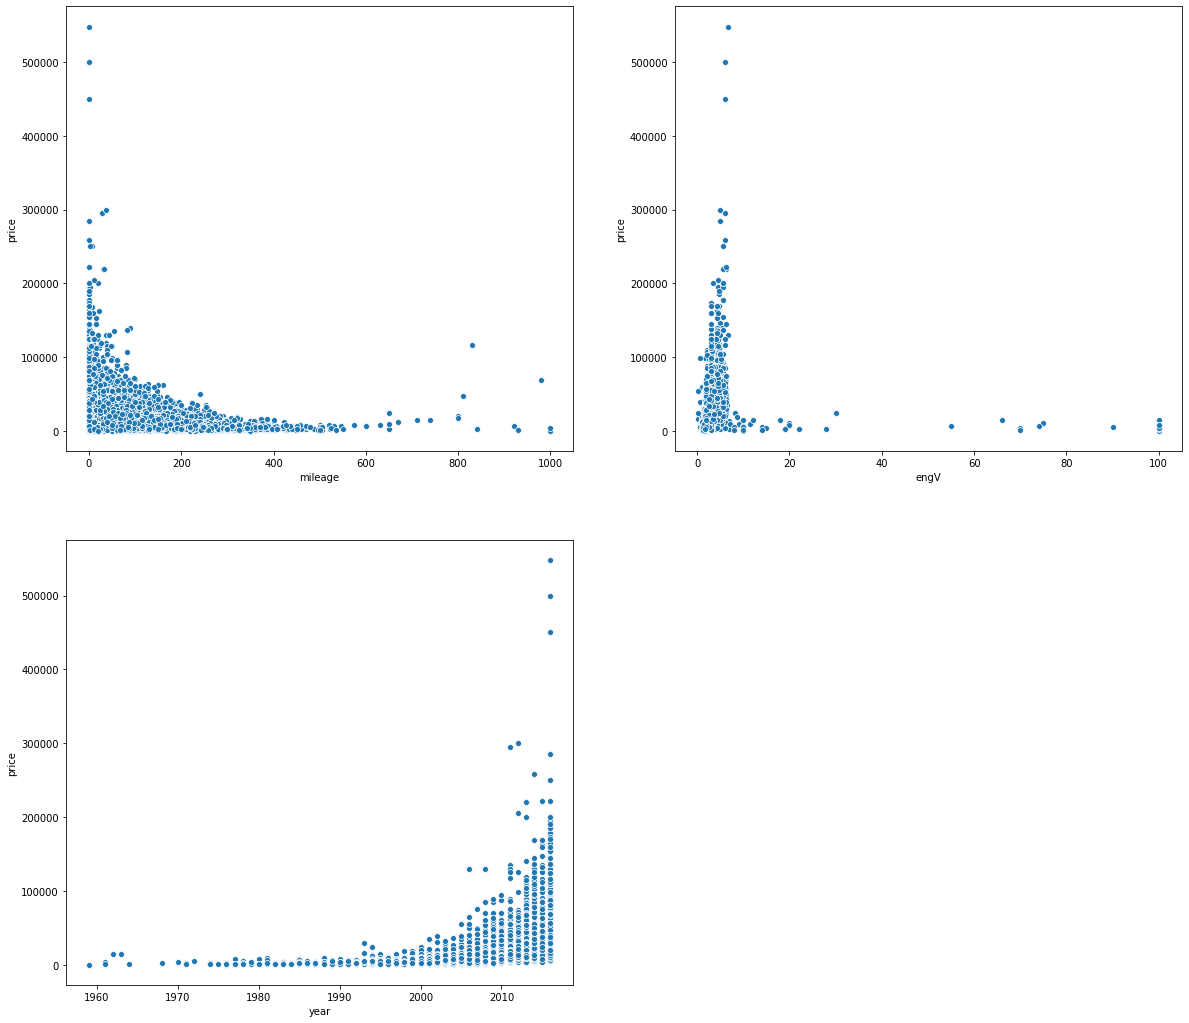

In [10]:
plt.figure(figsize=(20,18))
variables = ['mileage', 'engV', 'year']
for i, each in enumerate(variables):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=each, y='price', data=df)

### model

In [11]:
import statsmodels.formula.api as sm

In [12]:
formula = 'price ~ car + body + mileage + engV + engType + registration + year + model + drive'
lm = sm.ols(formula = formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     41.81
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:35:22   Log-Likelihood:                -90423.
No. Observations:                8495   AIC:                         1.826e+05
Df Residuals:                    7619   BIC:                         1.888e+05
Df Model:                         875                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2.023e+06   6.81e+04    -29.720      0.000   -2.16e+06   -1.89e+06
car[T.Alfa Romeo]               -2.196e+04   1.71e+04     -1.281      0.200   -5.56e+04    1.16e+04
car[T.Aro]                      -2.206e+04   5358.019     -4.117      0.000   -3.26e+04   -1.16e+04
car[T.Aston Martin]              2.887e+04   4456.948      6.478      0.000    2.01e+04    3.76e+04
car[T.Audi]                     -2.681e+04   2429.778    -11.032      0.000   -3.16e+04    -2.2e+04
car[T.BMW]                      -1.757e+04   5399.233     -3.254      0.001   -2.82e+04   -6982.736
car[T.BYD]                      -3.882e+04   3674.307    -10.565      0.000    -4.6e+04   -3.16e+04
car[T.Bentley]                   2.117e+05   3199.507     66.168      0.000    2.05e+05    2.18e+05
car[T.Bogdan]                    -4.34e+04   7623.435     -5.693      0.000   -5.83e+04   -2.85e+04
car[T.Buick]                    -1.378e+04   5350.053     -2.577      0.010   -2.43e+04   -3297.249
car[T.Cadillac]                 -3923.1508   4458.374     -0.880      0.379   -1.27e+04    4816.490
car[T.Chery]                    -4.585e+04   2489.111    -18.421      0.000   -5.07e+04    -4.1e+04
car[T.Chevrolet]                -3.409e+04   1957.755    -17.412      0.000   -3.79e+04   -3.03e+04
car[T.Chrysler]                 -3.335e+04   2845.614    -11.720      0.000   -3.89e+04   -2.78e+04
car[T.Citroen]                  -4.512e+04   2013.649    -22.405      0.000   -4.91e+04   -4.12e+04
car[T.Dacia]                     -1.27e+04   1.27e+04     -0.997      0.319   -3.77e+04    1.23e+04
car[T.Dadi]                     -3.382e+04   8345.933     -4.052      0.000   -5.02e+04   -1.75e+04
car[T.Daewoo]                   -3.452e+04   2340.303    -14.752      0.000   -3.91e+04   -2.99e+04
car[T.Daihatsu]                 -3.336e+04   4682.690     -7.123      0.000   -4.25e+04   -2.42e+04
car[T.Dodge]                    -3.303e+04   3250.508    -10.161      0.000   -3.94e+04   -2.67e+04
car[T.FAW]                      -2.764e+04   5376.576     -5.140      0.000   -3.82e+04   -1.71e+04
car[T.Ferrari]                   7.349e+04   5125.581     14.339      0.000    6.34e+04    8.35e+04
car[T.Fiat]                     -4.142e+04   1947.149    -21.272      0.000   -4.52e+04   -3.76e+04
car[T.Ford]                      -3.66e+04   1712.436    -21.371      0.000      -4e+04   -3.32e+04
car[T.GAZ]                       1.684e+04   1.62e+04      1.042      0.298   -1.48e+04    4.85e+04
car[T.GMC]                      -2.372e+04   5100.730     -4.650      0.000   -3.37e+04   -1.37e+04
car[T.Geely]                    -4.748e+04   2378.181    -19.966      0.000   -5.21e+04   -4.28e+04
car[T.Great Wall]               -4.012e+04   4044.350     -9.921      0.000   -4.81

In [13]:
df.head()

,car,body,mileage,engV,engType,registration,year,model,drive,price
0,Ford,crossover,68,2.5,Gas,yes,2010,Kuga,full,15500.0
1,Mercedes-Benz,sedan,173,1.8,Gas,yes,2011,E-Class,rear,20500.0
2,Mercedes-Benz,other,135,5.5,Petrol,yes,2008,CL 550,rear,35000.0
3,Mercedes-Benz,van,162,1.8,Diesel,yes,2012,B 180,front,17800.0
5,Nissan,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,16600.0


In [14]:
new_data = {
    'car': 'Mercedes-Benz',
    'body': 'other',
    'mileage': 68,
    'engV': 2.5,
    'engType': 'Gas',
    'registration': 'yes',
    'year': 2010,
    'model': 'Kuga',
    'drive': 'full'
}
new_df = df.copy()
new_df = new_df.append(new_data, ignore_index=True)
new_df

,car,body,mileage,engV,engType,registration,year,model,drive,price
0,Ford,crossover,68,2.5,Gas,yes,2010,Kuga,full,15500.0
1,Mercedes-Benz,sedan,173,1.8,Gas,yes,2011,E-Class,rear,20500.0
2,Mercedes-Benz,other,135,5.5,Petrol,yes,2008,CL 550,rear,35000.0
3,Mercedes-Benz,van,162,1.8,Diesel,yes,2012,B 180,front,17800.0
4,Nissan,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,16600.0
...,...,...,...,...,...,...,...,...,...,...
8491,Volkswagen,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,2200.0
8492,Mercedes-Benz,crossover,180,3.5,Petrol,yes,2008,ML 350,full,18500.0
8493,Lexus,sedan,150,3.5,Gas,yes,2008,ES 350,front,16999.0
8494,Audi,other,71,3.6,Petrol,yes,2007,Q7,full,22500.0


In [15]:
pred_price = lm.predict(new_df.iloc[-1:]).iloc[0]
pred_price

27555.992367027793

In [31]:
import pickle
pickle.dump(lm, open('model.pkl', 'wb'))

### model evaluation

In [16]:
## AIC penalize number of variables
## The smaller a model's AIC, the higher its quality.
lm.aic

182597.0481718299

In [17]:
## percentage of variation explained by the model. In this case, 82% 
lm.rsquared

0.8276262843601172

In [18]:
lm.resid.describe()

count    8.495000e+03
mean    -2.444069e-09
std      1.015098e+04
min     -1.100419e+05
25%     -2.862229e+03
50%     -2.732068e+02
75%      2.099958e+03
max      2.192930e+05
dtype: float64

Text(0, 0.5, 'error')

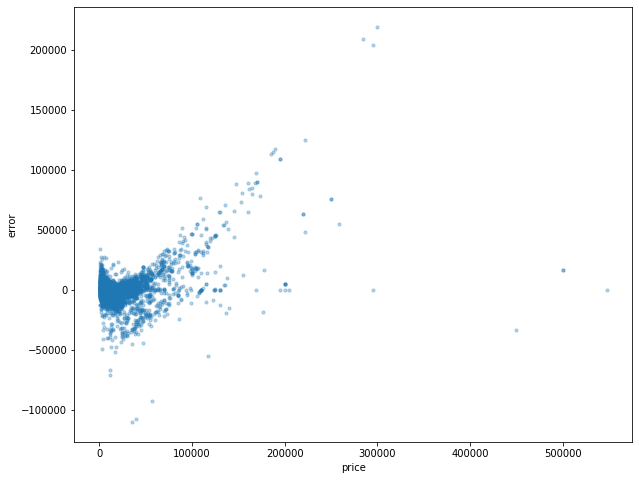

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(df['price'], lm.resid, s=10, alpha=0.3)
plt.xlabel('price')
plt.ylabel('error')